In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()


#Load in the data#

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

#Reshape the array from 2D to 1D#

In [8]:
y_test = y_test.reshape(-1,)


In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',  'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])



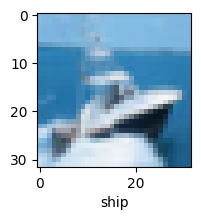

In [11]:
plot_sample(X_train,y_train,8)

#create a function that plots the image along with its label#

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

#Normalize the data so that it only takes on values between 0 and 1#





In [13]:
from keras.api._v2.keras import activations
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ANN.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 215s 137ms/step - loss: 1.8116 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 214s 137ms/step - loss: 1.6225 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 209s 134ms/step - loss: 1.5430 - accuracy: 0.4542
Epoch 4/5
1563/1563 [==============================] - 232s 149ms/step - loss: 1.4806 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 205s 131ms/step - loss: 1.4344 - accuracy: 0.4939


#Compile and train the neural network on the training set#

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(pred) for pred in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 11s 36ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.23      0.36      1000
           1       0.70      0.52      0.60      1000
           2       0.29      0.50      0.37      1000
           3       0.28      0.49      0.36      1000
           4       0.50      0.23      0.32      1000
           5       0.45      0.30      0.36      1000
           6       0.44      0.66      0.52      1000
           7       0.61      0.50      0.55      1000
           8       0.53      0.70      0.60      1000
           9       0.63      0.46      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



#predict the labels on the test set and display the classification report#

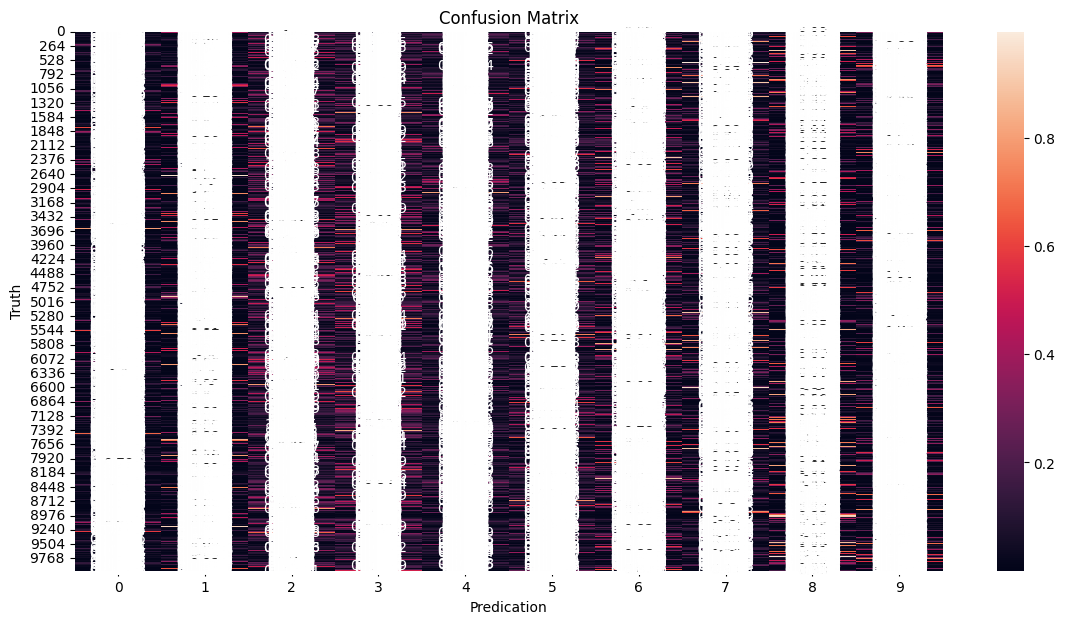

In [15]:
import seaborn as sns
plt.figure(figsize = (14,7))
sns.heatmap(y_pred,annot = True)
plt.ylabel('Truth')
plt.xlabel('Predication')
plt.title('Confusion Matrix')
plt.show()

In [16]:
CNN = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [17]:
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

CNN.fit(X_train, y_train, epochs = 10)






Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.4726 - accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1465 - accuracy: 0.5975
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0167 - accuracy: 0.6435
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9253 - accuracy: 0.6755
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8619 - accuracy: 0.7009
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8041 - accuracy: 0.7211
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7615 - accuracy: 0.7338
Epoch 8/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7203 - accuracy: 0.7490
Epoch 9/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6751 - accuracy: 0.7638
Epoch 10/10
1563/1563 [==============================] - 80s 51m

#Create a convolutional network with 2 convolutional layers and 2 linear layers. Then compile and train the model#

In [18]:
CNN.evaluate(X_test,y_test)


313/313 [==============================] - 5s 16ms/step - loss: 0.9211 - accuracy: 0.6985


[0.9211408495903015, 0.6984999775886536]

In [19]:
y_prediction = CNN.predict(X_test)
y_prediction[:5]

313/313 [==============================] - 8s 24ms/step


array([[1.4105101e-02, 6.9714333e-05, 3.1542812e-02, 7.9092580e-01,
        2.0586221e-02, 3.5777584e-02, 8.6706653e-02, 7.7078468e-05,
        1.9303033e-02, 9.0586860e-04],
       [1.1871516e-04, 4.9253693e-03, 5.6276278e-08, 1.4558411e-08,
        1.2400987e-08, 5.2326470e-11, 1.0529642e-08, 1.1614856e-09,
        9.9493212e-01, 2.3696544e-05],
       [3.8780145e-02, 5.4339266e-01, 2.6197531e-05, 2.0193462e-03,
        1.1299619e-04, 2.2377269e-05, 3.4548502e-05, 5.6656270e-04,
        3.7853411e-01, 3.6511146e-02],
       [9.4990426e-01, 1.8812368e-02, 5.6091615e-04, 2.9034732e-04,
        2.7048087e-03, 6.5940690e-06, 5.8421917e-04, 7.7273813e-05,
        2.6401451e-02, 6.5760204e-04],
       [1.0364866e-05, 1.7475340e-04, 5.1769741e-02, 5.4131337e-02,
        5.9829879e-01, 1.9269098e-02, 2.7625006e-01, 2.4776182e-05,
        3.0449671e-06, 6.8164234e-05]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_prediction]
y_classes[:5]


[3, 8, 1, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

#evaluate CNN and see how it fairs with the labeled data#

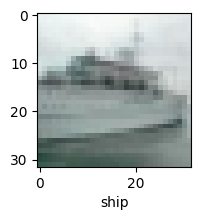

In [24]:
plot_sample(X_test,y_test,80)

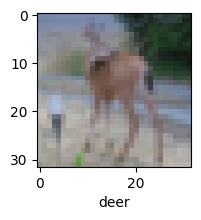

In [25]:
plot_sample(X_test,y_test,100)

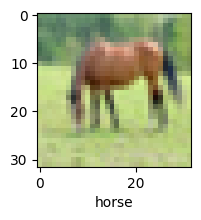

In [26]:
plot_sample(X_test,y_test,60)

In [27]:
classes[y_classes[60]]

'horse'

#As seen above, the labels match up with the image#